In [1]:
from lsst.daf.butler import Butler
import lsst.daf.butler as dafButler
import lsst.geom
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage
afwDisplay.setDefaultBackend('matplotlib') 
from lsst.pipe.tasks.scaleZeroPoint import ScaleZeroPointTask
task = ScaleZeroPointTask()

In [49]:
repo = '/repo/main'
butler = dafButler.Butler(repo)

In [50]:
test_old_collection = 'u/sullivan/DM-33001_TestOldDiffim_J'
test_new_collection = 'u/sullivan/DM-33001_TestNewDiffim_G'

In [4]:
dataId ={'detector': 35, 'visit': 413635, 'skymap': 'hsc_rings_v1', 'instrument': 'DECam'}

In [75]:
def plot_image(exposure, label='Old', smooth=0):
    print(np.nanmedian(exposure.image.array))
    try:
        fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
        afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
        afw_display.scale('linear', 'zscale')  # set the algorithm and scale for the pixel shading
        if smooth > 0:
            array = scipy.ndimage.median_filter(exposure.image.array, smooth)
            exposure = exposure.clone()
            exposure.image.array[...] = array
        afw_display.mtv(exposure.image)   # display the image data you retrieved with the butler
        plt.gca().axis('off')                 # turn off the x and y axes labels
        plt.title(f"{label} image")
    except AssertionError:
        print(f"{label} image is entirely {np.nanmedian(exposure.image.array)}")
        
def plot_mask(exposure, label='Old', vmax=None):
    print(np.nanmedian(exposure.mask.array))
    try:
        fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
        afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
        # afw_display.scale('linear', 'zscale')  # set the algorithm and scale for the pixel shading
        img = exposure.mask.array[...]
        if vmax is not None:
            img[img > vmax] = vmax
        plt.imshow(exposure.mask.array)   # display the image data you retrieved with the butler
        plt.gca().axis('off')                 # turn off the x and y axes labels
        plt.colorbar()
        plt.title(f"{label} image")
    except AssertionError:
        print(f"{label} mask is entirely {np.nanmedian(exposure.mask.array)}")

def plot_variance(exposure, label='Old', smooth=0):
    print(np.nanmedian(exposure.variance.array))
    try:
        fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
        afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
        afw_display.scale('linear', 'zscale')  # set the algorithm and scale for the pixel shading
        if smooth > 0:
            array = scipy.ndimage.median_filter(exposure.variance.array, smooth)
            exposure = exposure.clone()
            exposure.variance.array[...] = array
        afw_display.mtv(exposure.variance)   # display the image data you retrieved with the butler
        plt.gca().axis('off')                 # turn off the x and y axes labels
        plt.title(f"{label} variance")
    except AssertionError:
        print(f"{label} variance is entirely {np.nanmedian(exposure.image.array)}")

def plot_image_diff(exposure1, exposure2, label1='Old', label2='New', smooth=0, offset=0):
    print(np.nanmedian(exposure1.image.array - exposure2.image.array))
    try:
        image_diff = exposure1.image.clone()
        
        if offset != 0:
            image_diff.array -= np.roll(exposure2.image.array, offset, (0, 1))
        else:
            image_diff -= exposure2.image
        
        if smooth > 0:
            array = scipy.ndimage.median_filter(image_diff.array, smooth)
            image_diff.array[...] = array
        fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
        afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
        afw_display.scale('linear', 'zscale')  # set the algorithm and scale for the pixel shading
        afw_display.mtv(image_diff)   # display the image data you retrieved with the butler
        plt.gca().axis('off')                 # turn off the x and y axes labels
        plt.title(f"{label1} - {label2} image")
    except AssertionError:
        print(f"{label1} - {label2} image difference is entirely {np.nanmedian(exposure1.image.array - exposure2.image.array)}")

def plot_mask_diff(exposure1, exposure2, label1='Old', label2='New', smooth=0, offset=0):
    print(np.nanmedian(exposure1.mask.array - exposure2.mask.array))
    try:
        image_diff = exposure1.clone().mask.array[...]
        
        if offset != 0:
            image_diff -= np.roll(exposure2.mask.array, offset, (0, 1))
        else:
            image_diff -= exposure2.mask.array
        if np.std(image_diff) == 0:
            raise AssertionError
        fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
        afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
        plt.imshow(image_diff)   # display the image data you retrieved with the butler
        plt.gca().axis('off')                 # turn off the x and y axes labels
        plt.colorbar()      # turn off the x and y axes labels
        plt.title(f"{label1} - {label2} mask")
    except AssertionError:
        print(f"{label1} - {label2} mask difference is entirely {np.nanmedian(exposure1.mask.array - exposure2.mask.array)}")

def plot_variance_diff(exposure1, exposure2, label1='Old', label2='New', smooth=0):
    print(np.nanmedian(exposure1.variance.array - exposure2.variance.array))
    try:
        image_diff = exposure1.variance.clone()
        image_diff -= exposure2.variance
        if smooth > 0:
            array = scipy.ndimage.median_filter(image_diff.array, smooth)
            image_diff.array[...] = array
        fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
        afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
        afw_display.scale('linear', 'zscale')  # set the algorithm and scale for the pixel shading
        afw_display.mtv(image_diff)   # display the image data you retrieved with the butler
        plt.gca().axis('off')                 # turn off the x and y axes labels
        plt.title(f"{label1} - {label2} variance")
    except AssertionError:
        print(f"{label1} - {label2} variance difference is entirely {np.nanmedian(exposure1.variance.array - exposure2.variance.array)}")

# Begin by looking at the warped templates.
These should be exactly the same

In [76]:
template_old_test =  butler.get('goodSeeingDiff_templateExp' , dataId=dataId, collections=test_old_collection)

In [77]:
template_new_test =  butler.get('goodSeeingDiff_templateExp' , dataId=dataId, collections=test_new_collection)

0.11161438


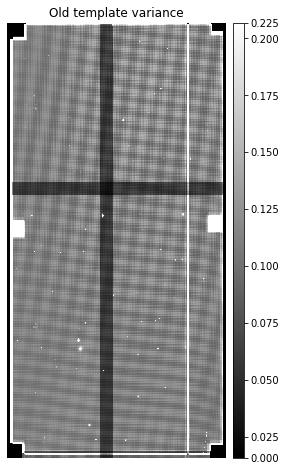

In [8]:
plot_variance(template_old_test, label='Old template')

0.11161438


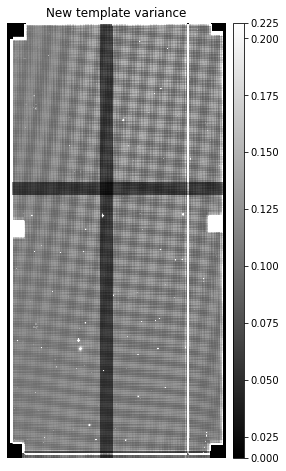

In [9]:
plot_variance(template_new_test, label='New template')

In [10]:
plot_variance_diff(template_old_test, template_new_test, label1='Old template', label2='New template')

0.0
Old template - New template variance difference is entirely 0.0


<Figure size 720x576 with 0 Axes>

0.0051627196


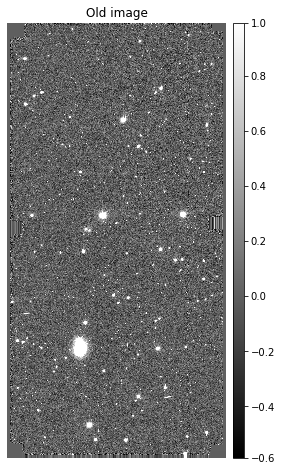

In [11]:
plot_image(template_old_test, label='Old')

0.0051627196


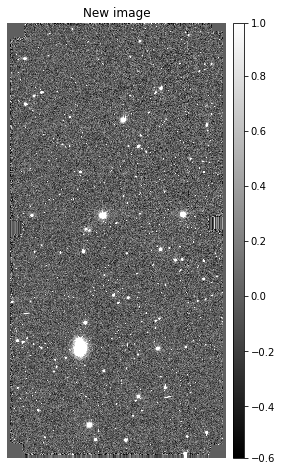

In [12]:
plot_image(template_new_test, label='New')

In [13]:
plot_image_diff(template_old_test, template_new_test, label1='Old template', label2='New template')

0.0
Old template - New template image difference is entirely 0.0


<Figure size 720x576 with 0 Axes>

# Look at the PSF-matched templates

In [14]:
# Refresh the butler instance if you have a new run
butler = dafButler.Butler(repo)

In [78]:
matched_old_test =  butler.get('goodSeeingDiff_matchedExp' , dataId=dataId, collections=test_old_collection)
matched_new_test =  butler.get('goodSeeingDiff_matchedExp' , dataId=dataId, collections=test_new_collection)

### PSF-matched template variance

1.0451593


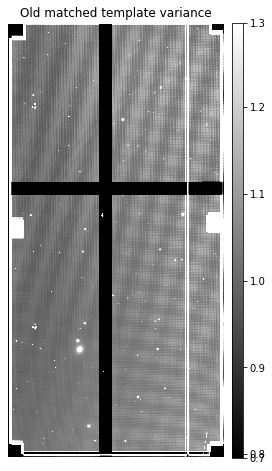

In [16]:
plot_variance(matched_old_test, label='Old matched template')

1.0451593


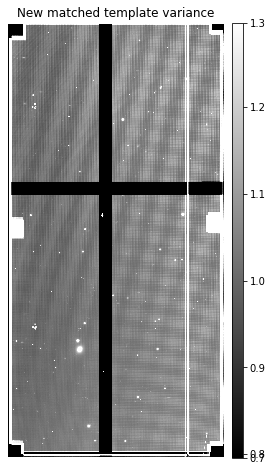

In [17]:
plot_variance(matched_new_test, label='New matched template')

In [18]:
plot_variance_diff(matched_old_test, matched_new_test, label1='Old matched', label2='New matched')

0.0
Old matched - New matched variance difference is entirely 0.0


/tmp/ipykernel_31310/549211319.py:94: RuntimeWarning: invalid value encountered in subtract
  print(np.nanmedian(exposure1.variance.array - exposure2.variance.array))
/tmp/ipykernel_31310/549211319.py:108: RuntimeWarning: invalid value encountered in subtract
  print(f"{label1} - {label2} variance difference is entirely {np.nanmedian(exposure1.variance.array - exposure2.variance.array)}")


<Figure size 720x576 with 0 Axes>

### PSF-matched template image

0.011240317


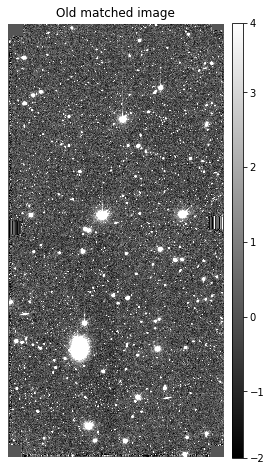

In [19]:
plot_image(matched_old_test, label='Old matched')

0.011240317


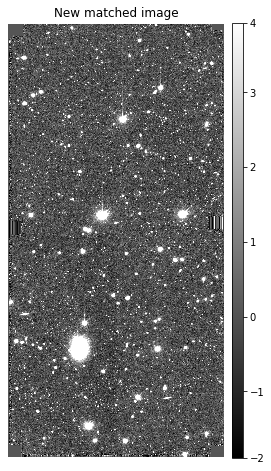

In [20]:
plot_image(matched_new_test, label='New matched')

In [21]:
plot_image_diff(matched_old_test, matched_new_test, label1='Old matched', label2='New matched', offset=0)

0.0
Old matched - New matched image difference is entirely 0.0


<Figure size 720x576 with 0 Axes>

In [22]:
np.isnan(matched_old_test.image.array).sum()

122480

In [23]:
np.isnan(matched_new_test.image.array).sum()

122480

### PSF-matched template mask

0.0


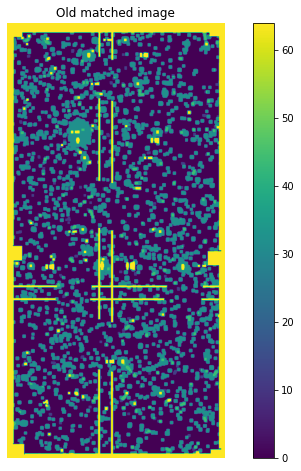

In [79]:
plot_mask(matched_old_test, label='Old matched', vmax=64)

0.0


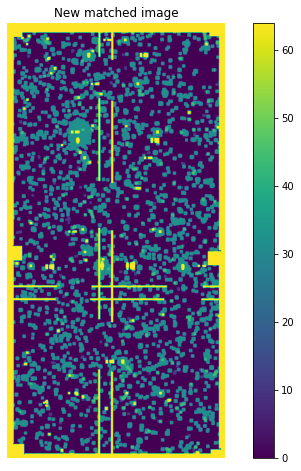

In [80]:
plot_mask(matched_new_test, label='New matched', vmax=64)

In [81]:
plot_mask_diff(matched_old_test, matched_new_test, label1='Old matched', label2='New matched')

0.0
Old matched - New matched mask difference is entirely 0.0


# Now look at the image differences

In [25]:
# Refresh the butler instance if you have a new run
butler = dafButler.Butler(repo)

In [51]:
diffim_old_test =  butler.get('goodSeeingDiff_differenceExp' , dataId=dataId, collections=test_old_collection)
diffim_new_test =  butler.get('goodSeeingDiff_differenceExp' , dataId=dataId, collections=test_new_collection)

In [52]:
ref_check = butler.registry.findDataset('goodSeeingDiff_differenceExp' , dataId=dataId, collections=test_new_collection)

In [53]:
ref_check.run

'u/sullivan/DM-33001_TestNewDiffim_G/20220512T232919Z'

In [54]:
ref_check.run

'u/sullivan/DM-33001_TestNewDiffim_G/20220512T232919Z'

### Variance

46.17061


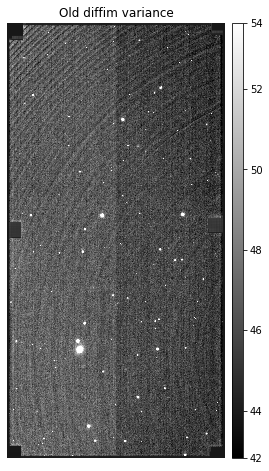

In [55]:
plot_variance(diffim_old_test, label='Old diffim')

46.170578


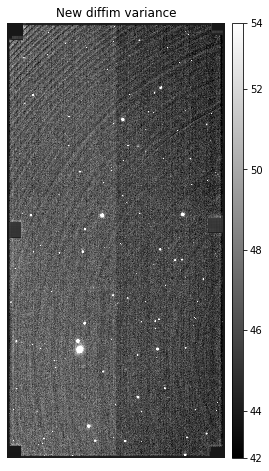

In [56]:
plot_variance(diffim_new_test, label='New diffim')

2.670288e-05


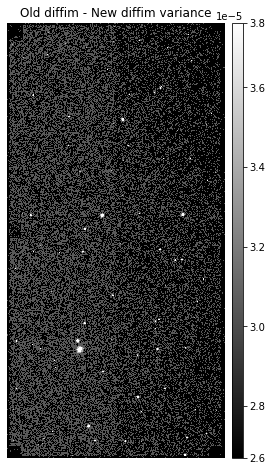

In [57]:
plot_variance_diff(diffim_old_test, diffim_new_test, label1='Old diffim', label2='New diffim')

### Image

0.0696167


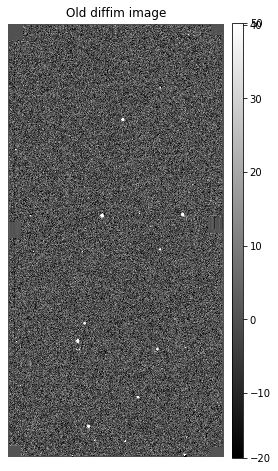

In [58]:
plot_image(diffim_old_test, label='Old diffim')

0.069616705


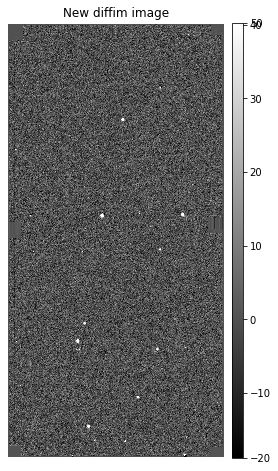

In [59]:
plot_image(diffim_new_test, label='New diffim')

0.0


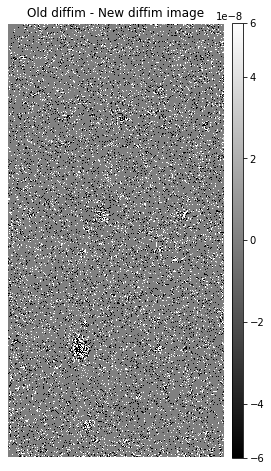

In [60]:
plot_image_diff(diffim_old_test, diffim_new_test, label1='Old diffim', label2='New diffim')

### Mask

0.0


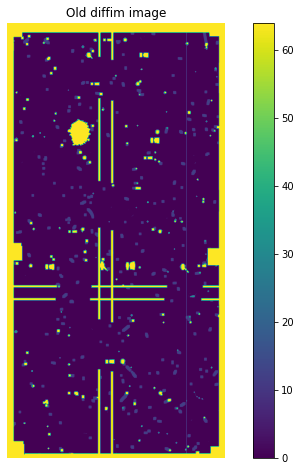

In [83]:
plot_mask(diffim_old_test, label='Old diffim', vmax=64)

0.0


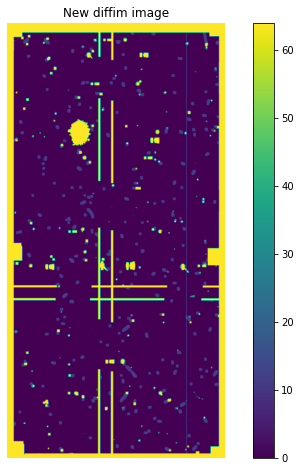

In [84]:
plot_mask(diffim_new_test, label='New diffim', vmax=64)

In [82]:
plot_mask_diff(diffim_old_test, diffim_new_test, label1='Old diffim', label2='New diffim')

0.0
Old diffim - New diffim mask difference is entirely 0.0


# Compare the old and new diaSources

In [61]:
diaSrc_old_test =  butler.get('goodSeeingDiff_diaSrc' , dataId=dataId, collections=test_old_collection)
diaSrc_new_test =  butler.get('goodSeeingDiff_diaSrc' , dataId=dataId, collections=test_new_collection)

In [37]:
diaSrc_old_test.asAstropy()

id,coord_ra,coord_dec,parent,flags_negative,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_x,base_PeakCentroid_y,base_PeakCentroid_flag,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_SdssCentroid_flag_badError,ip_diffim_NaiveDipoleCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PeakLikelihoodFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,base_SdssCentroid_flag_badInitialCentroid,base_SdssShape_flag_badCentroid,ext_trailedSources_Naive_flag_badCentroid,slot_Centroid_flag,ip_diffim_NaiveDipoleCentroid_pos_flag,slot_Centroid_pos_flag,ip_diffim_NaiveDipoleCentroid_neg_flag,slot_Centroid_neg_flag,ip_diffim_NaiveDipoleCentroid_x,slot_Centroid_x,ip_diffim_NaiveDipoleCentroid_y,slot_Centroid_y,ip_diffim_NaiveDipoleCentroid_xErr,slot_Centroid_xErr,ip_diffim_NaiveDipoleCentroid_yErr,slot_Centroid_yErr,ip_diffim_NaiveDipoleCentroid_pos_x,slot_Centroid_pos_x,ip_diffim_NaiveDipoleCentroid_pos_y,slot_Centroid_pos_y,ip_diffim_NaiveDipoleCentroid_pos_xErr,slot_Centroid_pos_xErr,ip_diffim_NaiveDipoleCentroid_pos_yErr,slot_Centroid_pos_yErr,ip_diffim_NaiveDipoleCentroid_neg_x,slot_Centroid_neg_x,ip_diffim_NaiveDipoleCentroid_neg_y,slot_Centroid_neg_y,ip_diffim_NaiveDipoleCentroid_neg_xErr,slot_Centroid_neg_xErr,ip_diffim_NaiveDipoleCentroid_neg_yErr,slot_Centroid_neg_yErr,base_SdssShape_xx,slot_Shape_xx,base_SdssShape_yy,slot_Shape_yy,base_SdssShape_xy,slot_Shape_xy,base_SdssShape_xxErr,slot_Shape_xxErr,base_SdssShape_yyErr,slot_Shape_yyErr,base_SdssShape_xyErr,slot_Shape_xyErr,base_SdssShape_x,slot_Shape_x,base_SdssShape_y,slot_Shape_y,base_SdssShape_instFlux,slot_Shape_instFlux,base_SdssShape_instFluxErr,slot_Shape_instFluxErr,base_SdssShape_psf_xx,slot_PsfShape_xx,slot_Shape_psf_xx,base_SdssShape_psf_yy,slot_PsfShape_yy,slot_Shape_psf_yy,base_SdssShape_psf_xy,slot_PsfShape_xy,slot_Shape_psf_xy,base_SdssShape_instFlux_xx_Cov,slot_Shape_instFlux_xx_Cov,base_SdssShape_instFlux_yy_Cov,slot_Shape_instFlux_yy_Cov,base_SdssShape_instFlux_xy_Cov,slot_Shape_instFlux_xy_Cov,base_SdssShape_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,base_SdssShape_flag_unweightedBad,base_GaussianFlux_flag_badShape_unweightedBad,slot_Shape_flag_unweightedBad,base_SdssShape_flag_unweighted,base_GaussianFlux_flag_badShape_unweighted,slot_Shape_flag_unweighted,base_SdssShape_flag_shift,base_GaussianFlux_flag_badShape_shift,slot_Shape_flag_shift,base_SdssShape_flag_maxIter,base_GaussianFlux_flag_badShape_maxIter,slot_Shape_flag_maxIter,base_SdssShape_flag_psf,base_GaussianFlux_flag_badShape_psf,slot_Shape_flag_psf,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_12_0_instFlux,slot_ApFlux_instFlux,base_CircularApertureFlux_12_0_ins

In [38]:
diaSrc_new_test.asAstropy()

id,coord_ra,coord_dec,parent,flags_negative,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_x,base_PeakCentroid_y,base_PeakCentroid_flag,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_SdssCentroid_flag_badError,ip_diffim_NaiveDipoleCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PeakLikelihoodFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,base_SdssCentroid_flag_badInitialCentroid,base_SdssShape_flag_badCentroid,ext_trailedSources_Naive_flag_badCentroid,slot_Centroid_flag,ip_diffim_NaiveDipoleCentroid_pos_flag,slot_Centroid_pos_flag,ip_diffim_NaiveDipoleCentroid_neg_flag,slot_Centroid_neg_flag,ip_diffim_NaiveDipoleCentroid_x,slot_Centroid_x,ip_diffim_NaiveDipoleCentroid_y,slot_Centroid_y,ip_diffim_NaiveDipoleCentroid_xErr,slot_Centroid_xErr,ip_diffim_NaiveDipoleCentroid_yErr,slot_Centroid_yErr,ip_diffim_NaiveDipoleCentroid_pos_x,slot_Centroid_pos_x,ip_diffim_NaiveDipoleCentroid_pos_y,slot_Centroid_pos_y,ip_diffim_NaiveDipoleCentroid_pos_xErr,slot_Centroid_pos_xErr,ip_diffim_NaiveDipoleCentroid_pos_yErr,slot_Centroid_pos_yErr,ip_diffim_NaiveDipoleCentroid_neg_x,slot_Centroid_neg_x,ip_diffim_NaiveDipoleCentroid_neg_y,slot_Centroid_neg_y,ip_diffim_NaiveDipoleCentroid_neg_xErr,slot_Centroid_neg_xErr,ip_diffim_NaiveDipoleCentroid_neg_yErr,slot_Centroid_neg_yErr,base_SdssShape_xx,slot_Shape_xx,base_SdssShape_yy,slot_Shape_yy,base_SdssShape_xy,slot_Shape_xy,base_SdssShape_xxErr,slot_Shape_xxErr,base_SdssShape_yyErr,slot_Shape_yyErr,base_SdssShape_xyErr,slot_Shape_xyErr,base_SdssShape_x,slot_Shape_x,base_SdssShape_y,slot_Shape_y,base_SdssShape_instFlux,slot_Shape_instFlux,base_SdssShape_instFluxErr,slot_Shape_instFluxErr,base_SdssShape_psf_xx,slot_PsfShape_xx,slot_Shape_psf_xx,base_SdssShape_psf_yy,slot_PsfShape_yy,slot_Shape_psf_yy,base_SdssShape_psf_xy,slot_PsfShape_xy,slot_Shape_psf_xy,base_SdssShape_instFlux_xx_Cov,slot_Shape_instFlux_xx_Cov,base_SdssShape_instFlux_yy_Cov,slot_Shape_instFlux_yy_Cov,base_SdssShape_instFlux_xy_Cov,slot_Shape_instFlux_xy_Cov,base_SdssShape_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,base_SdssShape_flag_unweightedBad,base_GaussianFlux_flag_badShape_unweightedBad,slot_Shape_flag_unweightedBad,base_SdssShape_flag_unweighted,base_GaussianFlux_flag_badShape_unweighted,slot_Shape_flag_unweighted,base_SdssShape_flag_shift,base_GaussianFlux_flag_badShape_shift,slot_Shape_flag_shift,base_SdssShape_flag_maxIter,base_GaussianFlux_flag_badShape_maxIter,slot_Shape_flag_maxIter,base_SdssShape_flag_psf,base_GaussianFlux_flag_badShape_psf,slot_Shape_flag_psf,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_12_0_instFlux,slot_ApFlux_instFlux,base_CircularApertureFlux_12_0_ins

In [39]:
src1 = diaSrc_new_test[0]
src0 = diaSrc_old_test[0]

In [40]:
cat1 = diaSrc_new_test.asAstropy().to_pandas()

In [41]:
cat0 = diaSrc_old_test.asAstropy().to_pandas()

In [ ]:
cat_diff = cat0.compare(cat1)

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 100):  # more options can be specified also
    display(cat_diff)

ip_diffim_DipoleFit_pos_instFlux                ip_diffim_DipoleFit_pos_instFluxErr  \
                                self          other                                self   
0                                NaN            NaN                                 NaN   
1                                NaN            NaN                         1084.857934   
2                                NaN            NaN                                 NaN   
3                                NaN            NaN                                 NaN   
4                                NaN            NaN                                 NaN   
5                                NaN            NaN                                 NaN   
7                                NaN            NaN                         3113.873760   
8                                NaN            NaN                                 NaN   
9                                NaN            NaN                                 NaN   
10                      66898.161676   66898.187207                          654.390954   
11                     219662.625268  219662.625248                         1604.213325   
12                               NaN            NaN                                 NaN   
13                      53840.390376   53840.387984                          281.652314   
14                               NaN            NaN                          570.318689   
15                               NaN            NaN                                 NaN   
16                               NaN            NaN                                 NaN   
17                               NaN            NaN                                 NaN   
18                               NaN            NaN                          316.823944   
21                               NaN            NaN                          145.448159   
22                               NaN            NaN                                 NaN   
23                               NaN            NaN                                 NaN   
24                               NaN            NaN                         1699.241558   
26                               NaN            NaN                          780.351472   
27                               NaN            NaN                                 NaN   
28                               NaN            NaN                         2653.320067   
31                               NaN            NaN                                 NaN   
33                               NaN            NaN                                 NaN   
34                               NaN            NaN                         2583.073705   
36                               NaN            NaN                                 NaN   
37                               NaN            NaN                                 NaN   
38                               NaN            NaN                          935.675034   
39                               NaN            NaN                          610.213327   
46                               NaN            NaN                         1376.907358   
48                               NaN            NaN                                 NaN   
49                               NaN            NaN                          327.948312   
51                               NaN            NaN                                 NaN   
52                               NaN            NaN                           55.756849   
53                               NaN            NaN                         3026.818126   
55                               NaN            NaN                                 NaN   
56                               NaN            NaN                          366.774337   
57                               NaN            NaN                                 NaN   
60                               NaN            NaN                         1368.811787   


In [44]:
def check_catalogs_equal(cat1, cat2, atol=1e-6, rtol=1e-6):
    df1 = cat1.asAstropy().to_pandas()
    df2 = cat2.asAstropy().to_pandas()
    if df1.equals(df2):
        print("The catalogs are precisely equal")
        return True
    cat_diff = df1.compare(df2)
    diff_tests = []
    failed_tests = []
    for _c in cat_diff:
        v1 = cat_diff[_c[0]].self
        v2 = cat_diff[_c[0]].other
        vdiff = v2.dropna() - v1.dropna()
        vdiff2 = 2*(v2.dropna() - v1.dropna())/(v2.dropna() + v1.dropna())
        if np.all(np.abs(vdiff) < atol) & np.all(np.abs(vdiff2) < rtol):
            diff_tests.append(True)
        else:
            diff_tests.append(False)
            amax = max(np.abs(vdiff))
            rmax = max(np.abs(vdiff2))
            failed_tests.append((_c[0], amax, rmax))
    if np.all(diff_tests):
        print(f"The catalogs are equal to within atol={atol} and rtol={rtol}")
        return True
    else:
        for _f in failed_tests:
            print(f"Column {_f[0]} differs: amax {_f[1]} rmax {_f[2]}")
        return False

In [62]:
check_catalogs_equal(diaSrc_new_test, diaSrc_old_test)

Column base_NaiveCentroid_x differs: amax 4.1866922401823103e-05 rmax 6.117587413507542e-08
Column base_NaiveCentroid_x differs: amax 4.1866922401823103e-05 rmax 6.117587413507542e-08
Column base_NaiveCentroid_y differs: amax 0.00013375922389968764 rmax 7.184889253564083e-08
Column base_NaiveCentroid_y differs: amax 0.00013375922389968764 rmax 7.184889253564083e-08
Column base_SdssCentroid_x differs: amax 3.1012898489279905e-06 rmax 5.9169604530984705e-09
Column base_SdssCentroid_x differs: amax 3.1012898489279905e-06 rmax 5.9169604530984705e-09
Column base_SdssCentroid_y differs: amax 1.1891698250110494e-05 rmax 3.571067225279134e-09
Column base_SdssCentroid_y differs: amax 1.1891698250110494e-05 rmax 3.571067225279134e-09
Column base_SdssCentroid_xErr differs: amax 0.00019073486328125 rmax 4.8310566853615455e-06
Column base_SdssCentroid_xErr differs: amax 0.00019073486328125 rmax 4.8310566853615455e-06
Column base_SdssCentroid_yErr differs: amax 5.7220458984375e-05 rmax 3.53377026840

False

# Check the diffim mask planes